# Python in 4 sittings: Sitting 4
## Introduction to Python
### Summary of the 4th(end) session
3rd July, 2021

&copy; [pi4py.netlify.app](https://pi4py.netlify.app)

feel free to contact us;

[arabindo@protonmail.com](mailto:arabindo@protonmail.com)

[kaustavbasu97@gmail.com](mailto:kaustavbasu97@gmail.com)

# Let us look back to the last session work once more, we will add label and cmap(color map) to the plot 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
lam = 5.0
k = 2*np.pi/lam
x0 = 1
sep = 20.0
side = 100
pts = 500
spacing = side/pts
x1 = side/2 + sep/2
y1 = side/2
x2 = side/2 - sep/2
y2 = side/2
data = np.zeros([pts, pts], dtype='float64')

for i in range(pts):
    y = spacing*i
    for j in range(pts):
        x = spacing*j
        r1 = np.sqrt((x-x1)**2+(y-y1)**2)
        r2 = np.sqrt((x-x2)**2 + (y-y2)**2)
        data[i,j] = x0*np.sin(k*r1) + x0*np.sin(k*r2)


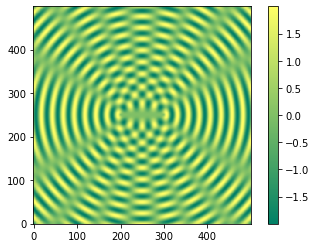

In [2]:
 # There are many other option for colorbar and cmap. consult the link given below!
plt.imshow(data, origin='below', cmap='summer')
plt.colorbar() 
# This will add a bar on the right hand side to undestand the density
plt.show()

## Now you can understand, yellowish color means there are constructive wavefronts and greenish line representing destructive wavefronts

#### Warning: Not need to go through every details, scroll down below, you'll see a lot of cmap options
https://matplotlib.org/stable/tutorials/colors/colormaps.html
    choose as per your preference and replace that `summer`
    
  A nice reading on image handling: https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py

# Debugging is the most important job to do.

It is difficult to explain, please consult first 10 or 15 min of the video I'm just putting the final code here

In [3]:
#11---------g-------5
def sqroot(x):
    guess = x/2
    if x>1 :
        lower = 1
        upper = x
    else:
        lower = x
        upper = 1
    while(abs(guess**2-x)>1e-02):
        guess = (upper+lower)/2
        if(guess**2>x): upper = guess
        else : lower = guess
    return guess

while True:
    a = float(input("enter a number: "))
    if(a<0): break
    print(sqroot(a))

enter a number: 5
2.234375
enter a number: 0.45
0.6734375
enter a number: -3


# Formatted outputs
##### notation:
```python
 print(f'statements {variable1} more statement {variable2}')
```
#### equivalent to

```pyhton
 print('statements ', variable1, 'more statement ', variable2)
```

In [4]:
a = []
for i in range(5):
    b = float(input(f'a({i})='))
    a.append(b)
print(a)

a(0)=2
a(1)=66
a(2)=89
a(3)=6.3
a(4)=5
[2.0, 66.0, 89.0, 6.3, 5.0]


# Let's start with simple recursion : Factorial!

In [5]:
def fact(n):
    if(n==1): return 1
    elif(n==0): return 1
    else:
        b = n*fact(n-1)
        return b
    
print(fact(5))

120


### NOTE: Within a function, if the interpreter encounter a `return` statement, it'll ignore the rest of the lines within that function

## The Hanoi Problem. 
Not so easy to explain in words. You can consult the recorded video, or this awesome video -channel: Computerphile.

https://www.youtube.com/watch?v=8lhxIOAfDss

In [6]:
def hanoi(n, a, c, b):
    if n==1:
        print('move', a, 'to', c)
    elif n==0: pass
    else:
        hanoi(n-1,a,b,c)
        hanoi(1,a,c,b)
        hanoi(n-1,b,c,a)
hanoi(3,'A','C','B')

move A to C
move A to B
move C to B
move A to C
move B to A
move B to C
move A to C


In [7]:
# Let's write a simple recursive function for
# Fibonacci Sequence

# In the session, I did it in
# slightly different clumsy notation.
# I think, it's a cleaner way!

def fib(n):
    if (n==0):
        f = 0
    elif(n==1):
        f = 1
    else:
        f = fib(n-1) + fib(n-2)
    return f

for i in range(5):
    print(fib(i))

0
1
1
2
3


## The problem here is, everytime, you're trying to get fib(n), you're calculating for the values for n-1,n-2 all upto 1. So there, a huge computation is going on. This kind of problems lead us to the concept of Dynamic Programming(DP). 

A beautiful visulaisation can be found here: https://visualgo.net/en/recursion

### Intuitively, DP is nothing but a careful brut force mthod. 

#### The idea here is to memorize the calculated value, say you asked for fib(5). Then the program would required to calculate fib(4), fib(3)...fib(1). So if you can store those value, at a later stage, your program can use those to reduce the heavy computation. Lead you to less time complexity. But wait, nothing is free of cost! Although time complexity is reduced heavily(polynomial time complexity), it will cost you more resources(memory! As you are storing those values)

### Let us now rewrite the fib(n) function to illustrate the concepts we discussed.

In [8]:
# Create a blank dictionary
# to memorise the computed values
mem = dict()
def fib(n):
    if n in mem:
        return mem[n]
    elif (n==0):
        mem[n] = 0
    elif(n==1):
        mem[n] = 1
    else:
        f = fib(n-1) + fib(n-2)
        mem[n] = f
    return mem[n]

for i in range(5):
    print(fib(i))

0
1
1
2
3


In [12]:
# check the mem dictionary 
print(mem)

{0: 0, 1: 1, 2: 1, 3: 2, 4: 3}


#### if you now ask for fib(7), it'll calculate f(6) and f(5) only. Rests are available in `mem`. So the function will directly put those values and calculate fib(7) for you!

### The problem is severe when for a particular value of n you have to calculate thing for sevaral datapoints. Say 10,000 points is to be calculated for a particular value of n. Then doing it over and over agin become time consuming

#### The fact can be demonstrate with Hermite polynomial calculation. This polynomials occurs as the solution of a differential equation, known as Hermite Differential Equation. You can calculate those polynomials using a recursion relation. The recursion relation is given by


$H_{n}(x) = 2xH_{n-1}(x) - 2(n-1)H_{n-2}(x)$

with base cases:

$H_{0}(x) = 1$ and $H_{1}(x) = 2x$


*** In the recorded video, you'll find that I got stuck. This was because I wrote the formula wrong.


In [9]:
poly = dict()
def her(n):
    # Unlike before, here you have to evaluate the function
    # on the different values of x
    x = np.linspace(-20,20,10000)
    if n in poly: return poly[n]
    elif n==0: val = np.ones(10000)
    elif n==1: val = 2*x
    else: val = 2*x*her(n-1) - 2*(n-1)*her(n-2)
    poly[n] = val
    return poly[n]

### So if now calculate her(5), it'll calculate her(4), her(3)...her(0). Advantage with poly dictionary is, later, the the program can use those values to calculate higher order terms

In [10]:
her(5)

array([-1.01122400e+08, -1.01020798e+08, -1.00919278e+08, ...,
        1.00919278e+08,  1.01020798e+08,  1.01122400e+08])

In [11]:
# look into the dictionaary
poly

{1: array([-40.       , -39.9919992, -39.9839984, ...,  39.9839984,
         39.9919992,  40.       ]),
 0: array([1., 1., 1., ..., 1., 1., 1.]),
 2: array([1598.        , 1597.36000001, 1596.72012804, ..., 1596.72012804,
        1597.36000001, 1598.        ]),
 3: array([-63760.        , -63721.65184544, -63683.31905088, ...,
         63683.31905088,  63721.65184544,  63760.        ]),
 4: array([2540812.        , 2538772.0896204 , 2536733.40625868, ...,
        2536733.40625868, 2538772.0896204 , 2540812.        ]),
 5: array([-1.01122400e+08, -1.01020798e+08, -1.00919278e+08, ...,
         1.00919278e+08,  1.01020798e+08,  1.01122400e+08])}

### If look into the result closely, you'll find that $H_0$ is calculated only after $H_1$. This is because, there is a term $H_{n-2}$ in the recursion relation. So when n=3, $H_1$ was evaluated, then n reduces to 2 only then $H_0$ was calculated. So the 0 th order term is appearing later.

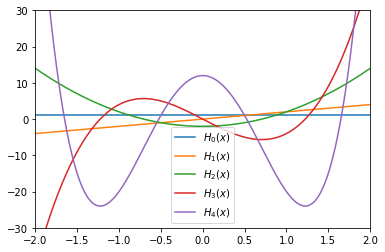

In [12]:
# Let us noe plot the polynomials

import matplotlib.pyplot as plt

plt.xlim(-2,2)
plt.ylim(-30,30)
var = np.linspace(-20,20,10000)
for i in range(5):
    plt.plot(var, her(i), label=f'$H_{i}(x)$')

plt.legend()   
plt.show() 
# This line is important if you're 
# running this code from .py file

###################################################################

## The upcoming part is not included in the recorded video, since there was no participants, the call was ended. So if you're having trouble in understanding certain things, feel free to contact us!

###################################################################

## Now the fun part! You donot need to know the Quantum Mechanics(QM). Just try to understand how you can have time varying plots. 


#### The solution of fundamental eqn in QM with potential function of the form $V(x)=\frac{1}{2} m \omega^2 x^2$ give us the solution of the form

$\psi_{n}(x, t) = A\exp\left(-x^2/2x_{0}^2\right)H_{n}\left(\frac{x}{x_0}\right)*\exp(-2\pi i E_nt/h)$

Where,

$i^2 = -1$

$E_n = n + (1/4\pi)h \omega$

$A = \frac{1}{\sqrt{\sqrt{\pi}2^n n! x_0}}$

$x_0 = \sqrt{ h / 2\pi m\omega}$

Here we will choose

$m=\omega=\frac{h}{2\pi}=1$, therefore, we set $x_0=1$ and $E_n = n+0.5$

#### We will do the time-independent part first, that is with t=0. And then will include time part.

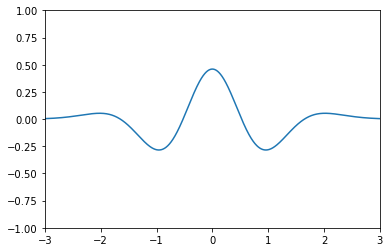

In [13]:
x = np.linspace(-20,20,10000)
n = 4
A = 1/np.sqrt(np.sqrt(np.pi)*np.math.pow(2,n)*np.math.factorial(n))
psi = A*np.exp(-x**2)*her(n)
plt.xlim(-3,3)
plt.ylim(-1,1)
plt.plot(x, psi)
plt.show() #optional for notebook users

## Now let us include the time varying part.  We will plot Real and Imaginary part separately along with the squared norm of $\psi_n(x)$ i.e. $|\psi|^2$

#### For this we will need to import a special class of matplotlib `FuncAnimation`
#### If you're using notebook, you must include `%matplotlib notebook` Otherwise, these interactive plot won't show up in the notebook.


In [14]:
from matplotlib.animation import FuncAnimation
%matplotlib notebook

#### Let us look at the arguments of FuncAnimation first

`FuncAnimation(figure_to_plot_animation, animation_function_to_update_data_using_some_parameter, 
               init_func=function_to_initialize_the_data, frames=np.arange(start,end,spacing), 
               interval=some_number)`
               
 ### So before we call FuncAnimation in our program we need to have a initialization function and a function to update data. Then finally, configure a figure to plot. 
 #### Let us set those one by one.

In [15]:
# step1: Define initialization function
def init():
    line1.set_data([],[])
    line2.set_data([],[])
    line3.set_data([],[])
    line = [line1, line2, line3]
    return line

In [16]:
# Step 2:
# Define the function to update the data
# with a parameter, say 't'
def animate(t):
    x = np.linspace(-20,20,10000)
    n = 4
    En = n + .5
    # Evaluate the expressions
    A = 1/np.sqrt(np.sqrt(np.pi)*np.math.pow(2,n)*np.math.factorial(n))
    psi = A*np.exp(-x**2)*her(n)
    re = np.cos(2*np.pi*En*t)*psi
    im = np.sin(2*np.pi*En*t)*psi
    norm = psi * psi
    #updating data
    line1.set_data(x, re)
    line2.set_data(x, im)
    line3.set_data(x, norm)
    return [line1, line2, line3]

<IPython.core.display.Javascript object>


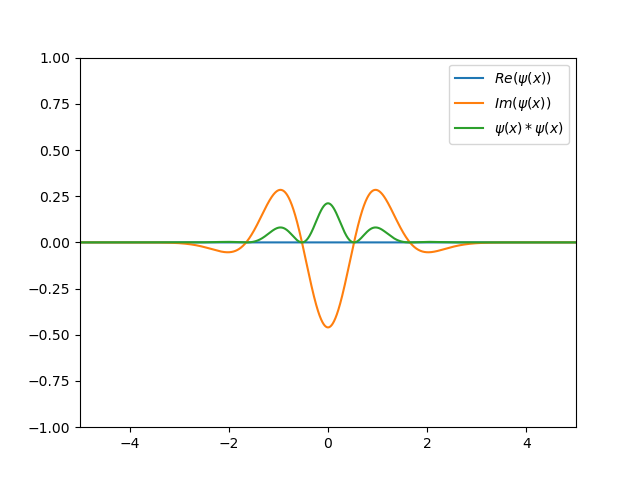

In [18]:
# Step 3: Configure a figure

fig = plt.figure()
ax = plt.axes(xlim=(-5,5), ylim=(-1,1))
line1, = ax.plot([],[])
line2, = ax.plot([],[])
line3, = ax.plot([],[])
# Three line, object because
# We will plot real, imaginary 
# and the norm
line1.set_label('$Re(\psi(x))$')
line2.set_label('$Im(\psi(x))$')
line3.set_label('$\psi(x)*\psi(x)$')
plt.legend()
# That comma after variable name,
# help us to create a tuple type data
# and Matplotlib convert tuple in a 
# datatype exclusive to this library


# Finally call the FuncAnimation and plot it

anim = FuncAnimation(fig, animate, init_func=init, frames=np.arange(0,20,0.1), interval=100)
plt.show()

In [19]:
anim.save('stationary_f.mp4')

## After running the above block, if you look at the animation closely, you'll find that the green line is not changing with time. This is why people call this type of solution to be a stationary state.

#### You can save this animation by running

`anim.save('filename.mp4')`

but use this command before you stop the animation by clicking on the stop button above that interactive plot. It'll take some time, then the video will appear in the same folder where you kept this this notebook.

### Comments for the participants with non Physics background

### The situation become more interesting when you take the linear superposition of the solutions. This is possible because the equation I talked about, known as Schrödinger equation, is a Linear Differential Equation.

You can add up solutions for different value of `n` and can plot. I'll include some simple example in the Problem set. 

On the other hand you can solve PDEs by any standard numerical method and use those data to animate the time evolution. You can do that with FuncAnimation or even with anyother language. Store the solution in a txt file or dat file and then use GNUPlot or any other plotting software(or library) to visualize(or to animate). I've already written a tutorial on how to do animation in GNUPlot. If you wish, you can check that out too: https://arabindo.github.io/animation

# That's all for this 4-sitting course. I hope you enjoyed. Wish you all the best :)

# Thank You for being a part of this journey!